In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
dataset = pd.read_csv('datasets/mail_data.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
dataset.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
dataset.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
dataset.isnull()
dataset.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
dataset.loc[dataset['Category'] == 'spam', 'Category',] = 0
dataset.loc[dataset['Category'] == 'ham', 'Category',] = 1

In [8]:
X = dataset['Message']
Y = dataset['Category']
Y=Y.astype('int')

In [9]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [10]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int32

In [11]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

TfidfVectorizer()

In [12]:
X = vectorizer.transform(X)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [14]:

from imblearn.over_sampling import SMOTE

# checking for imbalanced data
(Y_train==1).sum() - (Y_train==0).sum()



# balancing the imbalances data
smt = SMOTE()
X_train, Y_train = smt.fit_resample(X_train, Y_train)

In [45]:
print((Y_train==1).sum())
print((Y_train==0).sum())

3868
3868


In [15]:
type(X_train)

scipy.sparse._csr.csr_matrix

In [16]:
type(Y_train)

pandas.core.series.Series

In [17]:
model = LogisticRegression()

In [18]:
model

LogisticRegression()

In [19]:
model.fit(X_train, Y_train)

LogisticRegression()

In [20]:
X_train_prediction = model.predict(X_train)

In [21]:
X_train_prediction

array([1, 1, 1, ..., 0, 0, 0])

In [22]:
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [23]:
training_data_accuracy

0.9918562564632886

In [24]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
testing_data_accuracy

0.9730941704035875

In [25]:
confusion_matrix_train = confusion_matrix(Y_train, X_train_prediction)
confusion_matrix_train

array([[3828,   40],
       [  23, 3845]], dtype=int64)

In [26]:
confusion_matrix_test = confusion_matrix(Y_test, X_test_prediction)
confusion_matrix_test

array([[132,  26],
       [  4, 953]], dtype=int64)

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [29]:
clf.fit(X, Y)

RandomForestClassifier(max_depth=2, random_state=0)

In [30]:
X_train_prediction_rfc = clf.predict(X_train)
training_data_accuracy_rfc = accuracy_score(X_train_prediction_rfc, Y_train)
training_data_accuracy_rfc

0.5

In [31]:
X_test_prediction_rfc = clf.predict(X_test)
testing_data_accuracy_rfc = accuracy_score(X_test_prediction_rfc, Y_test)
testing_data_accuracy_rfc

0.8582959641255605

In [32]:
confusion_matrix_train_rfc = confusion_matrix(Y_train, X_train_prediction_rfc)
confusion_matrix_train_rfc

array([[   0, 3868],
       [   0, 3868]], dtype=int64)

In [33]:
confusion_matrix_test_rfc = confusion_matrix(Y_test, X_test_prediction_rfc)
confusion_matrix_test_rfc

array([[  0, 158],
       [  0, 957]], dtype=int64)

In [34]:
classific = classification_report(Y_train,X_train_prediction_rfc)
print('Classification Report: \n', classific)

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3868
           1       0.50      1.00      0.67      3868

    accuracy                           0.50      7736
   macro avg       0.25      0.50      0.33      7736
weighted avg       0.25      0.50      0.33      7736



E:\Ismt\AI\FakeNews\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Ismt\AI\FakeNews\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Ismt\AI\FakeNews\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

E:\Ismt\AI\FakeNews\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


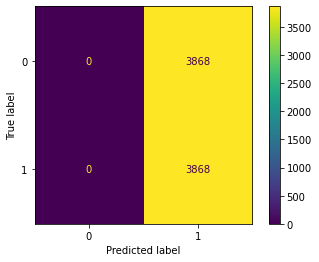

In [36]:
plot_confusion_matrix(clf, X_train, Y_train)

E:\Ismt\AI\FakeNews\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


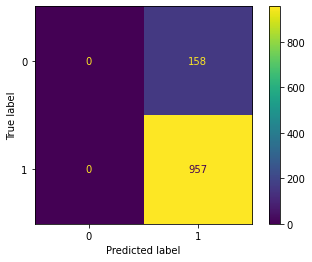

In [37]:
plot_confusion_matrix(clf, X_test, Y_test)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [39]:
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [40]:
X_train_prediction_kn = classifier.predict(X_train)
training_data_accuracy_kn = accuracy_score(X_train_prediction_kn, Y_train)
training_data_accuracy_kn

0.9985780765253361

In [41]:
X_test_prediction_kn = classifier.predict(X_test)
testing_data_accuracy_kn = accuracy_score(X_test_prediction_kn, Y_test)
testing_data_accuracy_kn

0.9452914798206278

E:\Ismt\AI\FakeNews\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


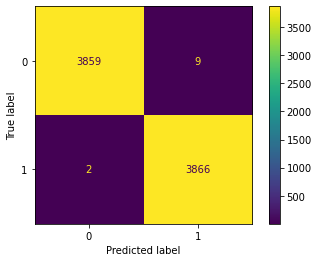

In [42]:
plot_confusion_matrix(classifier, X_train, Y_train)

E:\Ismt\AI\FakeNews\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


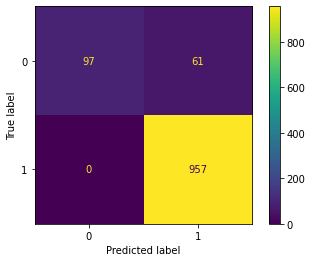

In [43]:
plot_confusion_matrix(classifier, X_test, Y_test)